# 05: Project

![](https://www.scdn.co/i/_global/open-graph-default.png)

While brainstorming about what project could we work upon that would allow us to learn and revise through the concepts we have learned throughout the bootcamp, and at the same time make it really cool, we came up with the idea of creating a Machine Learning Model based on data from Spotify!

Through this session (*the last one*😔), we'll be creating k-NN based ML model which allow us to classify songs into particular playlists.

Okay enough talk, let's get started! 🎵


## 1: Accessing Spotify Credentials

Before we get started, we'll need a source for our data for this project. As mentioned before, we'll be fetching the data we need, from Spotify itself!

To do so, first [create](https://www.spotify.com/ae-en/signup) a Spotify account.

Once done creating an account, head on to "[Spotify for Developers](https://developer.spotify.com/)", and navigate to "[Dashboard](https://developer.spotify.com/dashboard/login)".

After opening up the *Dashboard*, click on `Create an App`, with which you'll get `Client ID` and `Client Secret` (*which will be used in the code we'll be writing*).

### Get Spotify Client Information

In [1]:
!pip install spotipy

In [2]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
# client_id = "<ENTER CLIENT ID>"
client_id = '93afa71bdab647d3a971688255f7fcaf'
# client_secret = "<ENTER CLIENT SECRET"
client_secret = '0f834b4581174c849c5a4eb962c74ac8'
client_credentials_manager = SpotifyClientCredentials('93afa71bdab647d3a971688255f7fcaf', '0f834b4581174c849c5a4eb962c74ac8')
# client_credentials_manager = SpotifyClientCredentials('<ENTER SPOTIFY USERNAME>', '<ENTER CLIENT SECRET>')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

*Make sure to enter `Client ID`, `Client Secret`, and `Username` at the positions mentioned above in the code.*

### Download playlists and convert into `CSV`

In [3]:
id_test = sp.user_playlist_tracks('317d3qqu6wx3z2l444u2vde6onde', 'spotify:playlist:37i9dQZF1DXdPec7aLTmlC')['items'][0]['track']['id']
# id_test = sp.user_playlist_tracks('<ENTER SPOTIFY USERNAME>', '<ENTER SPOTIFY URI>')['items'][0]['track']['id']
columns = ['artist', 'track']
list(map(lambda x: columns.append(x), list(sp.audio_features(id_test)[0].keys())))

playlist_tracks = pd.DataFrame(columns = columns, index = range(0, 200))
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Insert Spotify URIs into the list below to create a dataframe from the playlists
playlist_ids = ['spotify:playlist:1llkez7kiZtBeOw5UjFlJq', 'spotify:playlist:1h90L3LP8kAJ7KGjCV2Xfd']
row_counter = 0

for playlist_id in playlist_ids:
    for track in sp.user_playlist_tracks('317d3qqu6wx3z2l444u2vde6onde', playlist_id)['items']:
        current_id = track['track']['id']
        current_row = [track['track']['artists'][0]['name'], track['track']['name']]
        (list(map(lambda x: current_row.append(x), list(sp.audio_features(current_id)[0].values()))))
        playlist_tracks.iloc[row_counter] = current_row
        row_counter += 1


In [5]:
playlist_tracks.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Katrina & The Waves,Walking On Sunshine,0.596,0.869,10,-11.97,1,0.037,0.0116,0.173,0.0678,0.944,109.902,audio_features,05wIrZSwuaVWhcv5FfqeH0,spotify:track:05wIrZSwuaVWhcv5FfqeH0,https://api.spotify.com/v1/tracks/05wIrZSwuaVW...,https://api.spotify.com/v1/audio-analysis/05wI...,238733,4
1,WALK THE MOON,Shut Up and Dance,0.578,0.866,1,-3.804,1,0.0619,0.00701,0,0.257,0.619,128.038,audio_features,4kbj5MwxO1bq9wjT5g9HaA,spotify:track:4kbj5MwxO1bq9wjT5g9HaA,https://api.spotify.com/v1/tracks/4kbj5MwxO1bq...,https://api.spotify.com/v1/audio-analysis/4kbj...,199080,4
2,The Edwin Hawkins Singers,Oh Happy Day,0.321,0.462,8,-10.711,1,0.0346,0.0961,0,0.102,0.457,116.782,audio_features,34yIb7hw5SuR80au1BHTtt,spotify:track:34yIb7hw5SuR80au1BHTtt,https://api.spotify.com/v1/tracks/34yIb7hw5SuR...,https://api.spotify.com/v1/audio-analysis/34yI...,308600,4
3,Andy Grammer,Good To Be Alive (Hallelujah),0.784,0.882,5,-3.646,1,0.0451,0.0377,0,0.65,0.699,120.017,audio_features,1fMEUGs5CvRv0VrcJlQITt,spotify:track:1fMEUGs5CvRv0VrcJlQITt,https://api.spotify.com/v1/tracks/1fMEUGs5CvRv...,https://api.spotify.com/v1/audio-analysis/1fME...,189870,4
4,American Authors,Best Day Of My Life,0.672,0.901,2,-2.415,1,0.0353,0.0545,0.000285,0.0792,0.507,99.989,audio_features,5k31cAfP8yymw8v0AYQIjr,spotify:track:5k31cAfP8yymw8v0AYQIjr,https://api.spotify.com/v1/tracks/5k31cAfP8yym...,https://api.spotify.com/v1/audio-analysis/5k31...,194000,4


In [6]:
playlist_tracks.to_csv('happy.csv', encoding='utf-8', index = False)

In [7]:
# playlist_tracks.to_csv(r'D:\Causality\GitHub\spotify-jam\happy_all.csv', index = False, header = True)

*Similarly, create a `csv` file of calm songs.*

### Import the required libraries

In [8]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns

### Read the `CSV` files

In [9]:
happy = pd.read_csv("happy.csv")
calm = pd.read_csv("calm.csv")

In [10]:
happy.head()

,artist,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Katrina & The Waves,Walking On Sunshine,0.596,0.869,10.0,-11.970,1.0,0.0370,0.01160,0.173000,0.0678,0.944,109.902,audio_features,05wIrZSwuaVWhcv5FfqeH0,spotify:track:05wIrZSwuaVWhcv5FfqeH0,https://api.spotify.com/v1/tracks/05wIrZSwuaVW...,https://api.spotify.com/v1/audio-analysis/05wI...,238733.0,4.0
1,WALK THE MOON,Shut Up and Dance,0.578,0.866,1.0,-3.804,1.0,0.0619,0.00701,0.000000,0.2570,0.619,128.038,audio_features,4kbj5MwxO1bq9wjT5g9HaA,spotify:track:4kbj5MwxO1bq9wjT5g9HaA,https://api.spotify.com/v1/tracks/4kbj5MwxO1bq...,https://api.spotify.com/v1/audio-analysis/4kbj...,199080.0,4.0
2,The Edwin Hawkins Singers,Oh Happy Day,0.321,0.462,8.0,-10.711,1.0,0.0346,0.09610,0.000000,0.1020,0.457,116.782,audio_features,34yIb7hw5SuR80au1BHTtt,spotify:track:34yIb7hw5SuR80au1BHTtt,https://api.spotify.com/v1/tracks/34yIb7hw5SuR...,https://api.spotify.com/v1/audio-analysis/34yI...,308600.0,4.0
3,Andy Grammer,Good To Be Alive (Hallelujah),0.784,0.882,5.0,-3.646,1.0,0.0451,0.03770,0.000000,0.6500,0.699,120.017,audio_features,1fMEUGs5CvRv0VrcJlQITt,spotify:track:1fMEUGs5CvRv0VrcJlQITt,https://api.spotify.com/v1/tracks/1fMEUGs5CvRv...,https://api.spotify.com/v1/audio-analysis/1fME...,189870.0,4.0
4,American Authors,Best Day Of My Life,0.672,0.901,2.0,-2.415,1.0,0.0353,0.05450,0.000285,0.0792,0.507,99.989,audio_features,5k31cAfP8yymw8v0AYQIjr,spotify:track:5k31cAfP8yymw8v0AYQIjr,https://api.spotify.com/v1/tracks/5k31cAfP8yym...,https://api.spotify.com/v1/audio-analysis/5k31...,194000.0,4.0


### Graph the attributes


Text(0.5, 1.0, 'acousticness in the playlists')

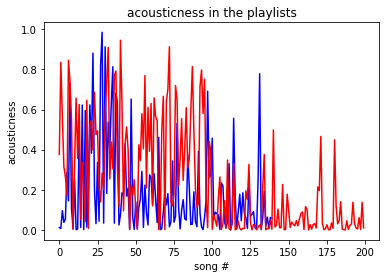

In [11]:
plt.plot(happy.acousticness, color='blue')
plt.plot(calm.acousticness, color='red')
plt.xlabel("song #")
plt.ylabel("acousticness")
plt.title("acousticness in the playlists")

### Combining the datasets

In [12]:
frames = [happy, calm]

# Add target variable
for i in range(len(frames)):
  frames[i]['target'] = [i for _ in range(happy.shape[0])]

happy_calm = pd.concat(frames, ignore_index=True)
happy_calm = happy_calm[['energy', 'acousticness', 'valence', 'target']]

for col in ['energy', 'acousticness', 'valence']:
  happy_calm[col] = 1000 * happy_calm[col]

happy_calm.to_csv("happy_calm.csv", encoding='utf-8', index = False)

In [13]:
happy_calm = pd.read_csv("happy_calm.csv")
happy_calm.head()

,energy,acousticness,valence,target
0,869.0,11.60,944.0,0
1,866.0,7.01,619.0,0
2,462.0,96.10,457.0,0
3,882.0,37.70,699.0,0
4,901.0,54.50,507.0,0


### Check for possible errors

In [14]:
# Null values
happy_calm.isnull().values.any()

True

In [15]:
# Check the datatypes
happy_calm.dtypes

energy          float64
acousticness    float64
valence         float64
target            int64
dtype: object

In [16]:
# Change the datatype
happy_calm = happy_calm.fillna(0)
for col in list(happy_calm.columns):
  happy_calm[col] = happy_calm[col].astype(int)
happy_calm

,energy,acousticness,valence,target
0,869,11,944,0
1,866,7,619,0
2,462,96,457,0
3,882,37,699,0
4,901,54,507,0
...,...,...,...,...
395,577,4,98,1
396,321,61,181,1
397,942,1,951,1
398,461,138,114,1


### Standardize the data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(happy_calm.drop('target', axis=1))

StandardScaler()

In [18]:
scaled_features = scaler.transform(happy_calm.drop('target',axis=1))
scaled_features

array([[ 1.23411859, -0.73616408,  1.71891449],
       [ 1.22337857, -0.75258692,  0.64184329],
       [-0.22294506, -0.38717872,  0.10496473],
       ...,
       [ 1.49545925, -0.77722118,  1.74211294],
       [-0.22652507, -0.2147389 , -1.03175964],
       [ 0.44293661, -0.74026979, -0.32917781]])

In [19]:
happy_calm_feat = pd.DataFrame(scaled_features, columns = happy_calm.columns[:-1])
happy_calm_feat.head()

,energy,acousticness,valence
0,1.234119,-0.736164,1.718914
1,1.223379,-0.752587,0.641843
2,-0.222945,-0.387179,0.104965
3,1.280659,-0.629416,0.906969
4,1.348679,-0.559619,0.270668


### Split the data

In [20]:
from sklearn.model_selection import train_test_split
X = happy_calm_feat
y = happy_calm['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, shuffle=True)

### Train the model

In [21]:
# Finding k value
import math
math.sqrt(len(y_test))

10.954451150103322

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

### Make predictions

In [23]:
prediction = knn.predict(X_test)
prediction

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

### Evaluate Predictions

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        63
           1       0.81      0.84      0.83        57

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



### Test other `k` values

In [25]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

### Plot Error Rate

Text(0, 0.5, 'error rate')

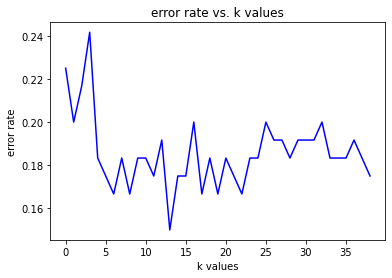

In [26]:
plt.plot(error_rate, color='blue')
plt.title('error rate vs. k values')
plt.xlabel('k values')
plt.ylabel('error rate')

### Use the best `k` value

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
prediction= knn.predict(X_test)
prediction

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        63
           1       0.81      0.84      0.83        57

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



## What more can I do?

There is so much you can do now with just this project!

Here are few suggestions that you folks must definitely try out:

- Adding more genres/emotions
- Automate creating playlists from the results
- Test it out with bigger datasets
- Improve the accuracy (*try other Models that you have learned*)
- Deploy it in the cloud
- Host the project in your GitHub profile
- And so much more! 🚀

## The End?

*Congratulations for completing the Machine Learning Bootcamp with ACM!* 🎉

Pat yourself! You deserve it! You have done great throughout the bootcamp.

**But is this the end?** *Haha!* Don't worry, your journey through Machine Learning has only just started. You have an entire world that you can explore and create amazing projects with (*one that could even change the way that we live our lives*). All the best for this journey! 🙌

*We, at ACM, know you'll ace it, like always!* 💪